## Weight  of evidence

Weight of Evidence (WoE) was developed primarily for the credit and financial industries to help build more predictive models to evaluate the risk of loan default. That is, to predict how likely the money lent to a person or institution is to be lost. Thus, Weight of Evidence is a measure of the "strength” of a grouping technique to separate good and bad risk (default). 

- WoE will be 0 if the P(Goods) / P(Bads) = 1, that is, if the outcome is random for that group.
- If P(Bads) > P(Goods) the odds ratio will be < 1 and,
- WoE will be < 0 if,  P(Goods) > P(Bads).

WoE is well suited for Logistic Regression, because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads)). Therefore, by using WoE-coded predictors in logistic regression, the predictors are all prepared and coded to the same scale, and the parameters in the linear logistic regression equation can be directly compared.

The WoE transformation has three advantages:

- It creates a monotonic relationship between the target and the independent variables.
- It orders the categories on a "logistic" scale which is natural for logistic regression
- The transformed variables can then be compared because they are on the same scale. Therefore, it is possible to determine which one is more predictive.

The WoE also has a limitation:

- Prone to cause over-fitting


For more details follow this [link](http://documentation.statsoft.com/StatisticaHelp.aspx?path=WeightofEvidence/WeightofEvidenceWoEIntroductoryOverview)


## In this demo:

We will see how to perform one hot encoding with:
- pandas

the exercise is based on the training notes:
Feature Engineering for Machine Learning
by Soledad Galli

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

pd.pandas.set_option('display.max_columns', None)

# for encoding with feature-engine
from feature_engine.categorical_encoders import WoERatioCategoricalEncoder

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.  Attributes 2 through 10 have been used to represent instances.   
Each instance has one of 2 possible classes: benign or malignant.
Class: 2 for benign, 4 for malignant


In [2]:

data_raw = pd.read_csv('C:\\Users\gusal\machine learning\Feature engineering\Brest_Cancer.csv')

In [3]:
data_raw.head()

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,2,5,1,1,1,2,1,3,1,1
1,2,5,4,4,5,7,10,3,2,1
2,2,3,1,1,1,2,2,3,1,1
3,2,6,8,8,1,3,4,3,7,1
4,2,4,1,1,3,2,1,3,1,1


 Because we are working with probabilities, and Class is the target, Class has to be between 0 and 1, 
 in this case benign will be zero and malign 1

In [4]:
data_raw.Class.replace({2:0, 4:1}, inplace = True)

In [5]:
data_raw.head()

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [6]:
data_raw.dtypes

Class                          int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
dtype: object

### Encoding important

We select calculate the woe using the train set, and then use those mappings in the test set.

Note that in the pandas implementation, we need to keep the target in the training set

In [7]:
inputs = data_raw.drop(['Class'], axis = 1)
target = data_raw.Class

In [8]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data_raw,  # this time we keep the target!!
    target,  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((478, 10), (205, 10))

### Explore original relationship between categorical variables and target

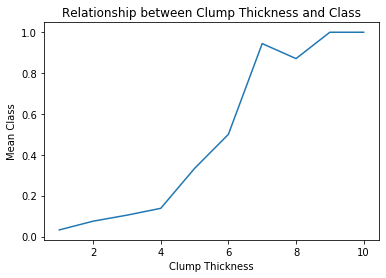

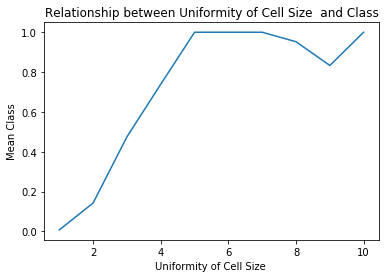

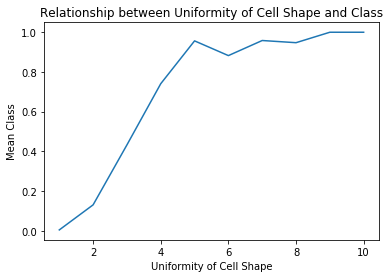

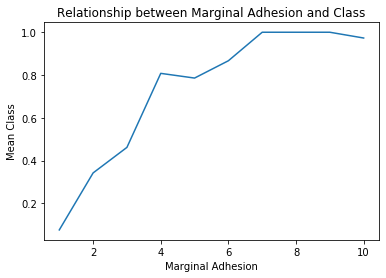

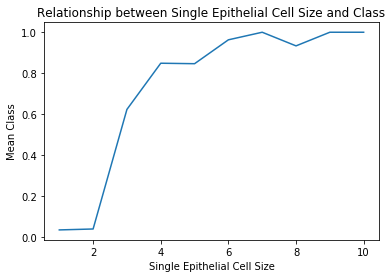

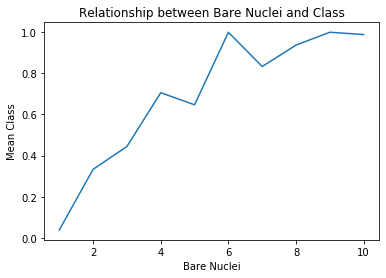

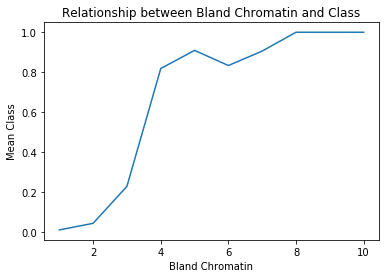

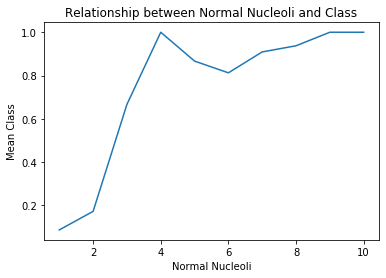

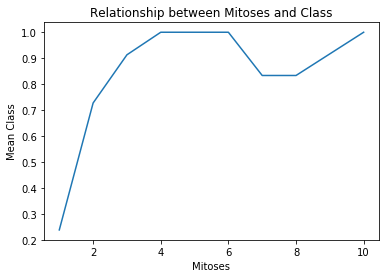

In [9]:
# let's explore the relationship of the categories with the target

for var in inputs.columns:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['Class'].mean().plot()
    fig.set_title('Relationship between {} and Class'.format(var))
    fig.set_ylabel('Mean Class')
    plt.show()

In [10]:
X_train.head(10)

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
109,1,8,6,4,3,5,9,3,1,1
477,0,4,1,1,1,1,1,2,1,1
205,1,8,10,8,8,4,8,7,7,1
318,0,5,2,2,2,2,1,2,2,1
190,0,8,4,4,5,4,7,7,8,2
306,0,4,4,4,4,6,5,7,3,1
406,1,10,10,10,7,10,10,8,2,1
360,0,3,1,2,1,2,1,2,1,1
366,0,1,1,1,1,2,1,1,1,1
222,0,1,1,1,1,1,1,3,1,1


You can see that the relationship between the target and cabin and embarked goes up and down, depending on the category.


## Weight of Evidence with pandas


### Advantages

- quick
- returns pandas dataframe

### Limitations of pandas:

- it does not preserve information from train data to propagate to test data

We need to store the mappings separately if planning to use the model in production.

In [11]:
inputs.columns

Index(['Clump Thickness', 'Uniformity of Cell Size ',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')

In [12]:
# let's calculate the probability of survived = 1 per category

prob_df = X_train.groupby(['Clump Thickness'])['Class'].mean()

# and capture it into a dataframe
prob_df = pd.DataFrame(prob_df)
prob_df

,Class
Clump Thickness,
1,0.032258
2,0.075000
3,0.104478
4,0.137931
5,0.333333
6,0.500000
7,0.944444
8,0.870968
9,1.000000


In [13]:
# and now the probability of survived = 0
#0 for benign, 1 for malignant
prob_df.rename(columns={"Class": "malignant"}, inplace=True)


In [14]:
prob_df.columns

Index(['malignant'], dtype='object')

In [15]:
prob_df['benign'] = 1 - prob_df.malignant

prob_df

,malignant,benign
Clump Thickness,,
1,0.032258,0.967742
2,0.075000,0.925000
3,0.104478,0.895522
4,0.137931,0.862069
5,0.333333,0.666667
6,0.500000,0.500000
7,0.944444,0.055556
8,0.870968,0.129032
9,1.000000,0.000000


In [16]:
prob_df['ratio'] = np.log(prob_df['malignant'] / prob_df['benign'])

In [17]:
prob_df

,malignant,benign,ratio
Clump Thickness,,,
1,0.032258,0.967742,-3.401197
2,0.075000,0.925000,-2.512306
3,0.104478,0.895522,-2.148434
4,0.137931,0.862069,-1.832581
5,0.333333,0.666667,-0.693147
6,0.500000,0.500000,0.000000
7,0.944444,0.055556,2.833213
8,0.870968,0.129032,1.909543
9,1.000000,0.000000,inf


In [18]:
# Solving division by zero. when a number is divided by zero, we make the log of result equal to 4.6

In [19]:
np.log(100)

4.605170185988092

In [20]:
prob_df.ratio = np.where(prob_df.benign == 0, 4.6, np.log(prob_df['malignant'] / prob_df['benign']))

In [21]:
prob_df

,malignant,benign,ratio
Clump Thickness,,,
1,0.032258,0.967742,-3.401197
2,0.075000,0.925000,-2.512306
3,0.104478,0.895522,-2.148434
4,0.137931,0.862069,-1.832581
5,0.333333,0.666667,-0.693147
6,0.500000,0.500000,0.000000
7,0.944444,0.055556,2.833213
8,0.870968,0.129032,1.909543
9,1.000000,0.000000,4.600000


In [22]:
# and now let's capture the ratio in a dictionary

ordered_labels = prob_df['ratio'].to_dict()

ordered_labels

{1: -3.4011973816621555,
 2: -2.512305623976115,
 3: -2.1484344131667874,
 4: -1.8325814637483102,
 5: -0.6931471805599454,
 6: 0.0,
 7: 2.8332133440562157,
 8: 1.9095425048844386,
 9: 4.6,
 10: 4.6}

In [23]:
# now, we replace the labels with the ratios

X_train['Clump Thickness'] = X_train['Clump Thickness'].map(ordered_labels)
X_test['Clump Thickness'] = X_test['Clump Thickness'].map(ordered_labels)

C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
X_train['Clump Thickness'].head(11)

109    1.909543
477   -1.832581
205    1.909543
318   -0.693147
190    1.909543
306   -1.832581
406    4.600000
360   -2.148434
366   -3.401197
222   -3.401197
494   -2.512306
Name: Clump Thickness, dtype: float64

In [25]:
# let's calculate the probability of the carcer being 2 for benign = 1 per category
# we can turn the previous commands into 2 functions


def find_category_mappings(df, variable, target):

    tmp = pd.DataFrame(df.groupby([variable])[target].mean())
    
    tmp['non-target'] = 1 - tmp[target]
    
    tmp['ratio'] = np.log(tmp[target] / tmp['non-target'])
    
    # when tmp['non-target'] == 0 the division is not defined, therfore I make the division = 100
    tmp.ratio = np.where(tmp['non-target'] == 0, 4.6, np.log(tmp[target] / tmp['non-target']))
    
    return tmp['ratio'].to_dict()


def integer_encode(train, test, variable, ordinal_mapping):

    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)

In [26]:
# and now we run a loop over the remaining categorical variables

for variable in [ 'Clump Thickness', 'Uniformity of Cell Size ','Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses']:
    
    mappings = find_category_mappings(X_train, variable, 'Class')
    
    integer_encode(X_train, X_test, variable, mappings)

C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
# let's see the result

X_train.head(10)

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
109,1,1.909543,4.600000,1.049822,-0.154151,1.704748,4.600000,-1.219240,-2.355032,-1.163151
477,0,-1.832581,-4.848116,-5.484797,-2.504554,-3.367296,-3.215233,-3.109061,-2.355032,-1.163151
205,1,1.909543,4.600000,2.890372,4.600000,1.722767,2.708050,2.261763,2.302585,-1.163151
318,0,-0.693147,-1.791759,-1.897120,-0.653926,-3.234749,-3.215233,-3.109061,-1.568616,-1.163151
190,0,1.909543,1.041454,1.049822,1.299283,1.722767,1.609438,2.261763,2.708050,0.980829
306,0,-1.832581,1.041454,1.049822,1.435085,3.258097,0.606136,2.261763,0.693147,-1.163151
406,1,4.600000,4.600000,4.600000,4.600000,4.600000,4.477337,4.600000,-1.568616,-1.163151
360,0,-2.148434,-4.848116,-1.897120,-2.504554,-3.234749,-3.215233,-3.109061,-2.355032,-1.163151
366,0,-3.401197,-4.848116,-5.484797,-2.504554,-3.234749,-3.215233,-4.624973,-2.355032,-1.163151
222,0,-3.401197,-4.848116,-5.484797,-2.504554,-3.367296,-3.215233,-1.219240,-2.355032,-1.163151


In [28]:
X_train.columns

Index(['Class', 'Clump Thickness', 'Uniformity of Cell Size ',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')

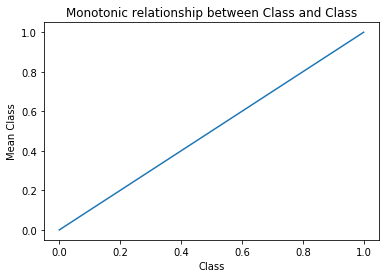

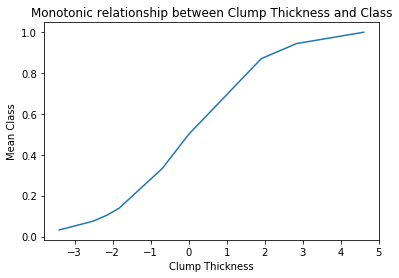

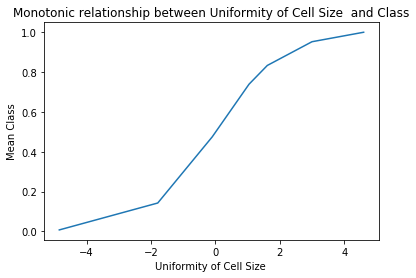

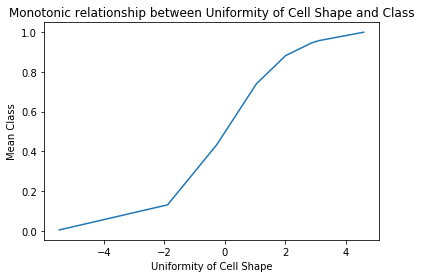

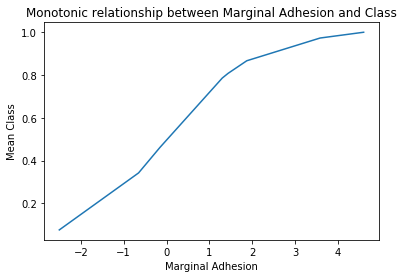

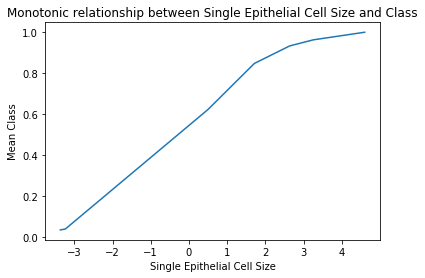

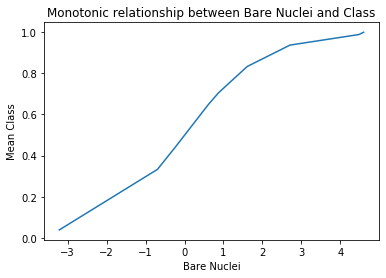

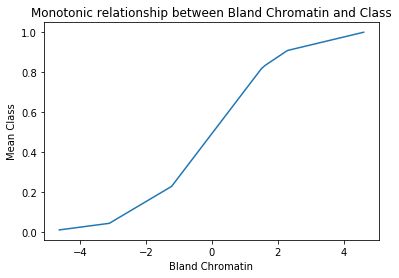

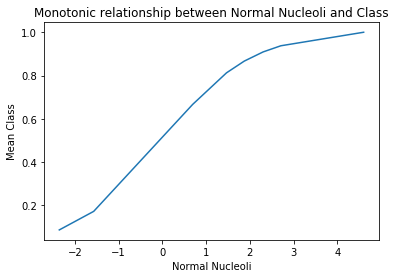

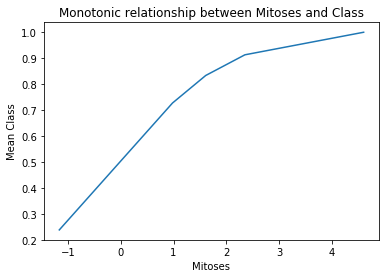

In [29]:
# let's inspect the newly created monotonic relationship
# between the categorical variables and the target

for var in X_train.columns:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['Class'].mean().plot()
    fig.set_title('Monotonic relationship between {} and Class'.format(var))
    fig.set_ylabel('Mean Class')
    plt.show()

Note the monotonic relationships between the mean target and the categories.
The relation ship between the target and the inputs is more closer than we use Probability ratio encoding

### Note

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand. I will explain how to do this, in a later notebook.

**In addition, it will create NA or Inf if the probability of target = 0 is zero, as the division by zero is not defined.**